# Sentiment analysis
deep learning model for analysing sentiments.

## Requirement
 - Tensorflow
 - Keras
 - sklearn
 - pandas
 - Numpy

In [1]:
from keras.layers import LSTM, Dense, Reshape, Conv2D, MaxPooling2D, Flatten, Bidirectional
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [3]:
pos = pd.read_table('dataset/training.txt', names = ['y', 'x'])
pos = shuffle(pos)
data =pos['x']
y = pos['y']

In [4]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Input, TimeDistributed, Conv1D, MaxPool1D, Activation
from keras.models import Model

# Tokenizing sentence inputs
`To keep tokens normalized, we use english word dataset`
[https://github.com/dwyl/english-words](https://github.com/dwyl/english-words)

In [5]:
words = pd.read_table('dataset/words.txt', names = ['x'])
words = words.astype(str)

In [8]:
tok.word_index['hell'] # These are always going to have contant indices

482

# Making word sequence using Keras preprocessing functions

`['hello', 'hi'], ['hi'] => [100, 200], [200, 0]`

In [7]:
tok = Tokenizer()
tok.fit_on_texts(words['x'])
seq  = tok.texts_to_sequences(data)

v = len(tok.word_index)
slice_len = 80

In [9]:
max_len = max([len(i) for i in seq])
d = max_len / slice_len
if int(d) < d:
    max_len = int(d + 1) * slice_len
max_len = int(max_len)
padded = pad_sequences(seq, maxlen = max_len) #855 is divisible by 15
max_len

880

In [10]:
xx = padded / v

In [11]:
yy = to_categorical(y, num_classes=2)
y,yy

(3314    1
 434     1
 5502    0
 5159    0
 77      1
 4665    0
 4593    0
 1679    1
 1134    1
 4695    0
 3468    1
 2668    1
 3311    1
 4740    0
 1978    1
 5540    0
 1170    1
 3218    1
 1433    1
 2442    1
 1766    1
 1156    1
 3542    1
 4726    0
 4287    0
 3107    1
 6376    0
 2216    1
 2913    1
 5205    0
        ..
 4160    0
 2792    1
 1362    1
 6343    0
 6217    0
 3946    0
 5145    0
 5299    0
 6635    0
 3892    1
 2150    1
 1912    1
 5955    0
 3655    1
 4315    0
 5518    0
 5541    0
 4192    0
 5294    0
 6827    0
 3082    1
 6834    0
 2007    1
 4871    0
 3030    1
 5363    0
 6860    0
 2586    1
 6866    0
 1315    1
 Name: y, Length: 6918, dtype: int64, array([[ 0.,  1.],
        [ 0.,  1.],
        [ 1.,  0.],
        ..., 
        [ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.]]))

In [12]:
yz = yy.reshape((6918, 1, 2))

In [13]:
xx.shape, yy.shape,
xz = xx.reshape((6918, int(max_len//slice_len), slice_len))

# Deeplearning model
MLP -> Bidirection LSTM -> fully connected layers -> output

In [14]:
model = Sequential()  

model.add(Dense(input_shape = (None, slice_len), units = 1024))
model.add(Bidirectional(LSTM(input_shape = (None, slice_len), units = 512, dropout = 0.3, activation = 'relu')))
model.add(Dense(units = 512, activation='tanh'))
model.add(Dense(units = 512, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
# model.add(Activation("sigmoid"))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
hists = []
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, None, 1024)        82944     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024)              6295552   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 7,166,978
Trainable params: 7,166,978
Non-trainable params: 0
_________________________________________________________________


# Load weights 
loading weights of model trained yesterday to continue training/testing/deploying today.

In [15]:
model.load_weights('model_56.hdf')

## Making training and evaluation batches

In [16]:
x_train = xz[:6000]
y_train = yy[:6000]
x_val = xz[6000:]
y_val = yy[6000:]


## Train the model

In [60]:
from IPython.display import clear_output


In [74]:
for i in range(10):
    hist = model.fit(x_train, y_train, 
                     batch_size=50, 
                     epochs = 10, 
                     verbose = 1,
                     shuffle = True,
                     validation_data = (x_val, y_val)
                    )
    hists.append(hist)
    clear_output()
    model.save_weights('model_56.hdf')

In [19]:
import matplotlib.pyplot as plt

## Training hostory/improvement stats

In [73]:

acc, loss

([0.93816666454076769,
  0.95149999757607773,
  0.95216666360696156,
  0.95399999966224036,
  0.95733333329359693,
  0.95583333124717074,
  0.95849999884764359,
  0.96016666640837989,
  0.96216666400432582,
  0.95866666634877518],
 [0.049095799435842004,
  0.038467176460350555,
  0.037842561353075628,
  0.036349663701063642,
  0.034848105323908384,
  0.034695388287703584,
  0.033138132838939779,
  0.032082951263873838,
  0.031025371246020464,
  0.031816009928297716])

## Predicting output of model with evaluation data

In [18]:
xd = data[6000:]
result = list(zip(model.predict(x_val), xd))

In [27]:
new = pd.read_table('dataset/kaggle.txt', names = ['x'])['x'][0]

(11, 80)

In [54]:
def getData(string):
    seq_new  = tok.texts_to_sequences([string])

    max_len = max([len(i) for i in seq])
    d = max_len / slice_len
    if int(d) < d:
        max_len = int(d + 1) * slice_len
    max_len = int(max_len)
    padded = pad_sequences(seq_new, maxlen = max_len) #855 is divisible by 15
    xx = padded / v
    xx = xx.reshape((1,max_len//slice_len,slice_len))
    return xx
    
test = getData("that guy sucked")

model.predict(test)

array([[ 0.49366254,  0.49231741]], dtype=float32)

In [48]:
data

3314                        I love Brokeback Mountain....
434                 da vinci code was an awesome movie...
5502                                 I hate Harry Potter.
5159         Is it just me, or does Harry Potter suck?...
77                              i LOVE the da vinci code!
4665                                 Da Vinci Code sucks.
4593    i heard da vinci code sucked soo much only 2.5...
1679    Which is why i said silent hill turned into re...
1134    Hey, Mission Impossible 3 is AWESOME!!!!!!!!!!...
4695                                 Da Vinci Code sucks.
3468                      man i loved brokeback mountain!
2668                                 I love Harry Potter.
3311       Anyway, thats why I love " Brokeback Mountain.
4740                   The Da Vinci Code sucked big time.
1978    we're gonna like watch Mission Impossible or H...
5540    Always knows what I want, not guy crazy, hates...
1170    I like MISSION IMPOSSIBLE but I hate Tom Cruis...
3218          

In [ ]:
p

In [71]:
acc, loss = [], []
for i in hists:
    acc += i.history['acc'][:]
    loss += i.history['loss'][:]


## Let's plot metrics
 - Accuracy
 - Loss

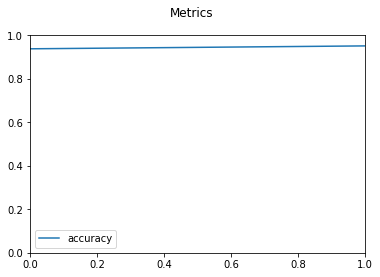

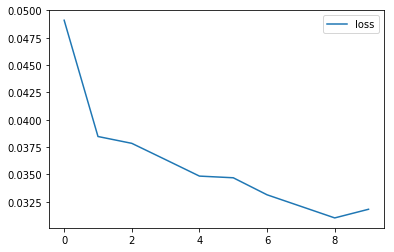

In [82]:
ax = plt.axis()
plt.axis(ax)
# plt.figure(figsize=(5, 5))
# plt.suptitle("hello")
plt.plot(acc, label = 'accuracy')
plt.legend()
plt.show()
plt.plot(loss, label = 'loss')
plt.legend()
plt.show()